In [165]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import patsy


from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%config InlineBackend.figure_format = 'svg'

In [154]:
df = pd.read_pickle('../emp_df_clean')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,left
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,0,1
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,0,1


In [160]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'support', 'technical',
       'left', 'int_term_1'],
      dtype='object')

In [161]:
new_columns = ['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'support', 'technical',
       'int_term_1']

df = df[new_columns]

## Feature Engineering Before Normalization

### Feature 1 - last_evaluation * number_project

In [155]:
df['int_term_1'] = df.last_evaluation * df.number_project

In [156]:
y = df['left']
X = df.drop(columns=['left', 'last_evaluation', 'number_project'])

- Ensure duplicate rows are not in test data

In [157]:
# deleting duplicate rows
df_no_dupelicates = df[df.duplicated()==False]
df_no_dupelicates.shape

(11989, 18)

In [158]:
df_no_dupelicates.to_pickle('emp_df_final')

In [159]:
df = df.drop['left']

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,left,int_term_1
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,0,1,1.06
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,0,1,4.30
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,0,1,6.16
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,0,1,4.35
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,0,1,1.04


In [169]:
# function to give columns names in patsy format
def patsy_names(df, dependent_var, *excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [170]:
patsy_names(df_no_dupelicates, 'left')

'left ~ satisfaction_level + last_evaluation + number_project + average_monthly_hours + time_spend_company + Work_accident + promotion_last_5years + salary + RandD + accounting + hr + management + marketing + product_mng + support + technical + int_term_1'

In [171]:
y, X = patsy.dmatrices('left ~ satisfaction_level + last_evaluation + number_project + average_monthly_hours + time_spend_company + Work_accident + promotion_last_5years + salary + RandD + accounting + hr + management + marketing + product_mng + support + technical + int_term_1', data=df_no_dupelicates, return_type="dataframe")

In [172]:
# x_raw = df.iloc[:, 1:]
# y_raw = np.array(df['left'])

# sss1 = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

# sss1.get_n_splits()
# for train_index, test_index in sss1.split(x_raw, y_raw):
#     X_train, X_test = x_raw.loc[train_index,:], x_raw.loc[test_index,:]
#     y_train, y_test = y_raw[train_index], y_raw[test_index]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
scaler = StandardScaler()

In [118]:
X_train_scl = X_train.drop(columns=['Intercept', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'support', 'Work_accident',
       'promotion_last_5years', 'technical'])

In [119]:
X_train_scaled = scaler.fit_transform(X_train_scl)

In [120]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [121]:
X_train = pd.merge(X_train_scaled, X_train.drop(columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'salary', 'int_term_1']).reset_index(drop=True), left_index=True, right_index=True)

In [122]:
X_test_scl = X_test.drop(columns=['Intercept', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'support', 'Work_accident',
       'promotion_last_5years', 'technical'])

In [123]:
X_test_scaled = scaler.fit_transform(X_test_scl)

In [124]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [125]:
X_test = pd.merge(X_test_scaled, X_test.drop(columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'salary', 'int_term_1']).reset_index(drop=True), left_index=True, right_index=True)

KNN

In [126]:
# find out why f1 score gives knn n of 1
ks = range(1,20,2)
param_grid = [{'n_neighbors': ks}]

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', 
                       verbose=10, n_jobs=-1)
knn_results = knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    8.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    9.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.9s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [127]:
knn_results.best_params_

{'n_neighbors': 19}

In [128]:
knn_results.best_score_

0.9651190612150344

#### ROC Curve for KNN Model only

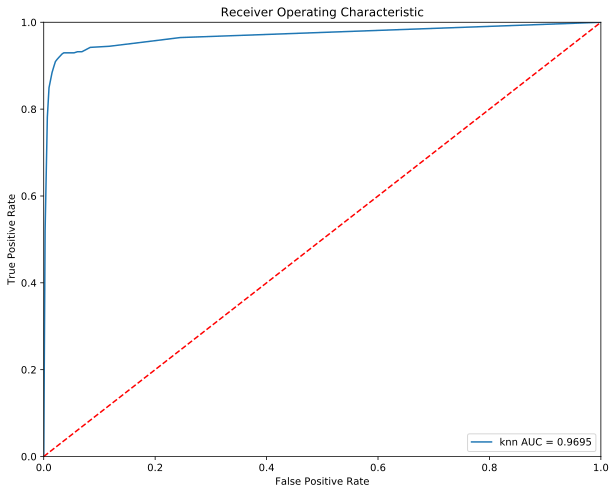

In [129]:
model_list = [knn_grid.best_estimator_]

model_name = ['knn']

# Plot ROC curve for all my models
fig, ax = plt.subplots(figsize=(10,8))
for i, model in enumerate(model_list):
    if model == 'ensemble':
        w1 = 0.10
        w2 = 0.80
        y_pred = (w1*logistic_grid.best_estimator_.predict_proba(X_test)[:,1] 
                  + w2*rf_grid.best_estimator_.predict_proba(X_test)[:,1])
    else:
        # changed form model.predict_proba to clf.predict_proba
        y_pred = list(model.predict_proba(X_test)[:,1])
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc))

plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### ROC curve for KNN modelling satisfaction level only

In [130]:
sat_predictor = X_for_scaling.satisfaction_level
sat_test = X_for_scaling2.satisfaction_level

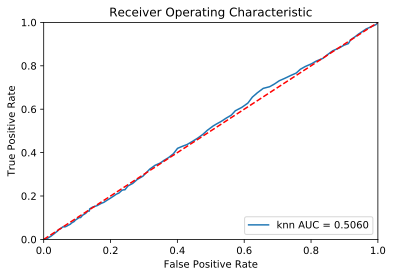

In [131]:
y_pred = 1 - sat_test
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc))

plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM

In [132]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'kernel': kernel}

svc = SVC(probability=True)
svc_grid = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', 
                       verbose=10, n_jobs=-1)
svc_results = svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    8.3s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    8.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   12.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   17.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'a

In [133]:
svc_results.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [134]:
svc_results.best_params_

{'kernel': 'rbf'}

In [135]:
svc_results.best_score_

0.968208433162178

Logistic Regression

In [136]:
penalty = ['l2', 'l2']
C = np.logspace(-3, 1, 100)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='liblinear', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0862s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1631s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:    7.1s
[Parallel(n_jo

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.09750e-03, ..., 9.11163e+00, 1.00000e+01]), 'penalty': ['l2', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [137]:
logistic_grid.best_estimator_

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
logistic_grid.best_score_

0.9192786712817316

Random Forest

In [139]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, None],
    'max_features': ['sqrt'], 
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [100, 200, 400, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.7min
[Paralle

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [50, 100, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [100, 200, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [140]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 400}

In [141]:
rf_grid.best_score_

0.9832317509507892

In [150]:
f1_score(y_test,rf_grid.predict(X_test))

0.9558441558441558

In [142]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [143]:
print('Best ROC_AUC for knn: %0.4f' % knn_grid.best_score_)
print('Best ROC_AUC for logit: %0.4f' % logistic_grid.best_score_)
print('Best ROC_AUC for svm: %0.4f' % svc_grid.best_score_)
print('Best ROC_AUC for rf: %0.4f' % rf_grid.best_score_)

Best ROC_AUC for knn: 0.9651
Best ROC_AUC for logit: 0.9193
Best ROC_AUC for svm: 0.9682
Best ROC_AUC for rf: 0.9832


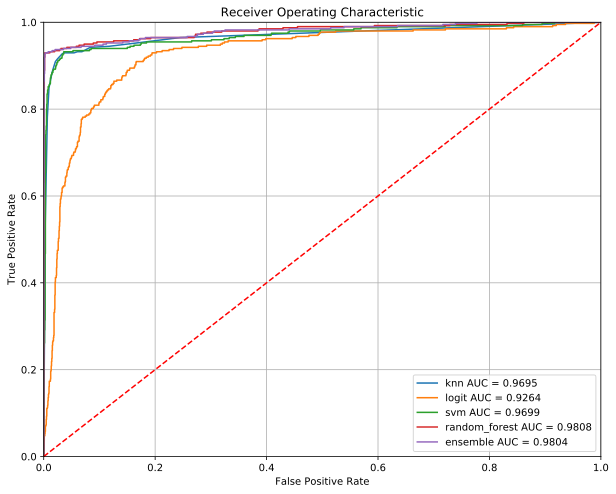

In [147]:
# ROC for all the models
model_list = [knn_grid.best_estimator_, 
              logistic_grid.best_estimator_, 
              svc_grid.best_estimator_, 
              rf_grid.best_estimator_,
              'ensemble']

model_name = ['knn', 'logit', 'svm', 'random_forest', 'ensemble']

# Plot ROC curve for all my models
fig, ax = plt.subplots(figsize=(10,8))
for i, model in enumerate(model_list):
    if model == 'ensemble':
        w1 = 0.10
        w2 = 0.80
        y_pred = (w1*logistic_grid.best_estimator_.predict_proba(X_test)[:,1] 
                  + w2*rf_grid.best_estimator_.predict_proba(X_test)[:,1])
    else:
        y_pred = list(model.predict_proba(X_test)[:,1])
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc))

plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Final dataset

In [108]:
# df = pd.read_pickle('../emp_df_clean')
# df.head()

In [109]:
# df.drop(columns=['last_evaluation', 'number_project'], inplace=True)

In [110]:
# df.to_pickle('emp_final_df')

In [111]:
# df.corr()